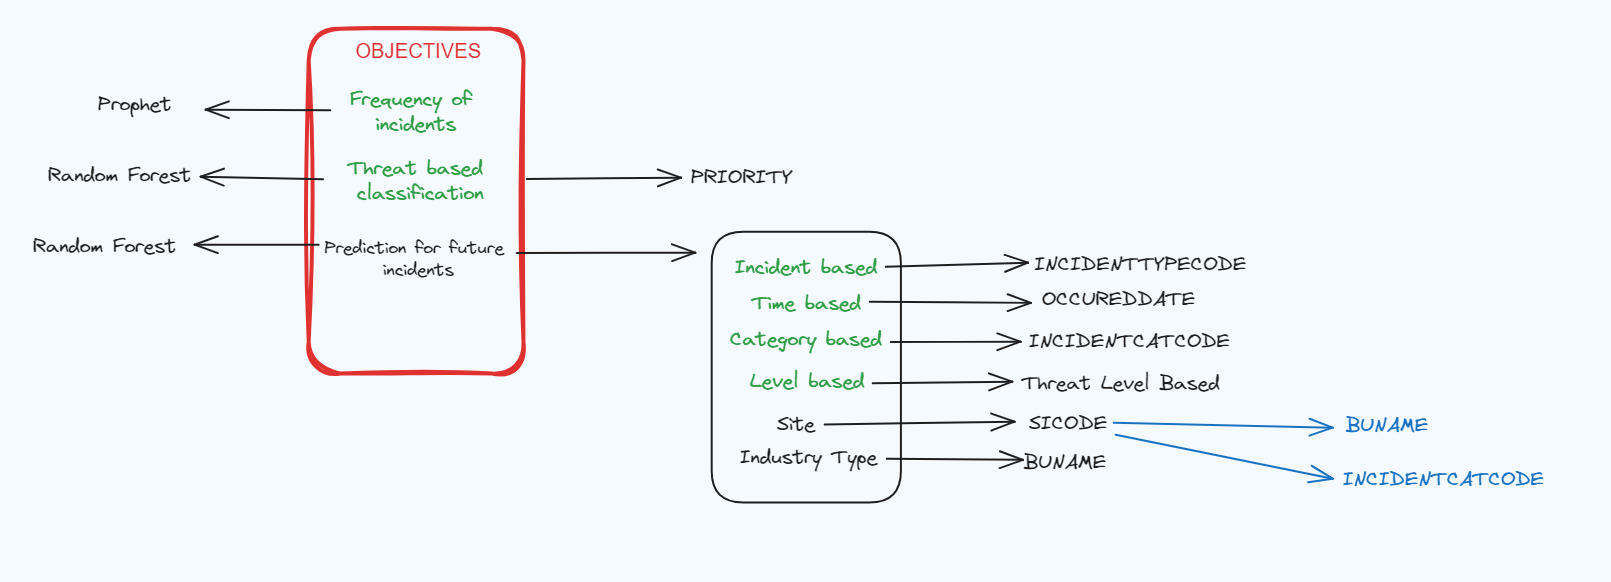

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PRIORITY          17999 non-null  object
 1   OCCUREDDATE       17999 non-null  object
 2   REPORTEDDATE      17999 non-null  object
 3   LASTUPDATEDDATE   17999 non-null  object
 4   BVCODE            17999 non-null  object
 5   BUNAME            17999 non-null  object
 6   SICODE            17999 non-null  object
 7   LMCODE            17999 non-null  object
 8   INCIDENTTYPECODE  17999 non-null  object
 9   INCIDENTCATCODE   17999 non-null  object
dtypes: object(10)
memory usage: 1.4+ MB
None

First few rows of the dataset:
      PRIORITY OCCUREDDATE REPORTEDDATE LASTUPDATEDDATE    BVCODE    BUNAME  \
0  Information  14-03-2023   17-03-2023      17-03-2023  Airports  Airports   
1  Information  09-07-2023   11-07-2023      11-07-2023  Airports  Airports   
2  

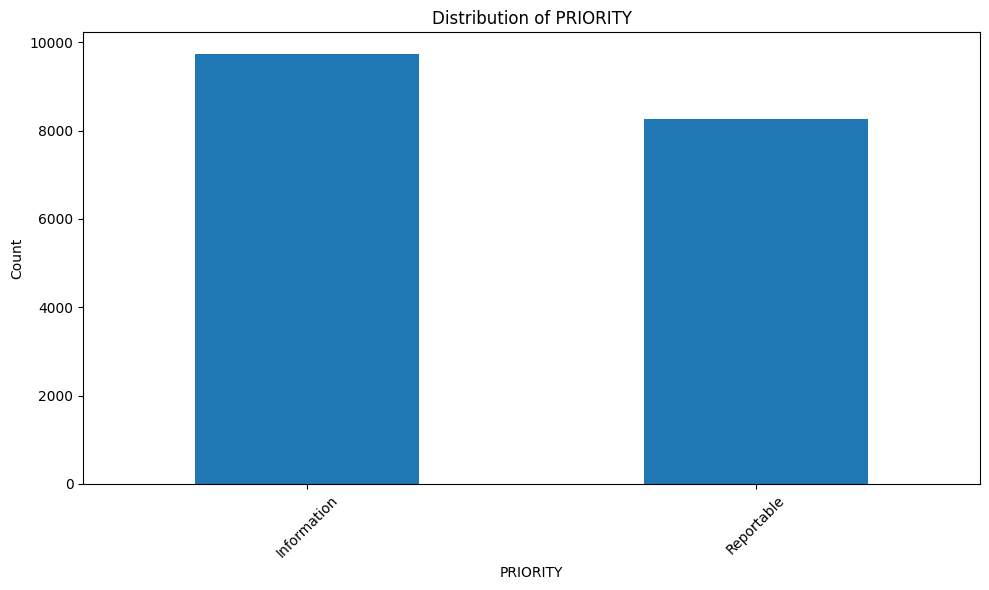


Value counts for BVCODE:
BVCODE
Ports              6869
Airports           3452
Thermal            2254
THERMAL-MSPVL      2165
Renewable          1345
Coal Mining         372
CMT-ACC             297
GAIMS               296
Logistics           250
PetChem             159
AEL                 118
CMT-AMBUJA          110
Realty               61
Copper               49
ADSTL                40
Digital              34
AEML - D             28
Transmission         26
RMRW                 24
AGL                  15
ADTPS-Dahanu         11
Iron Ore-Mining      10
Adani ConneX          8
Agri Logistics        4
Realty - MH           2
Name: count, dtype: int64


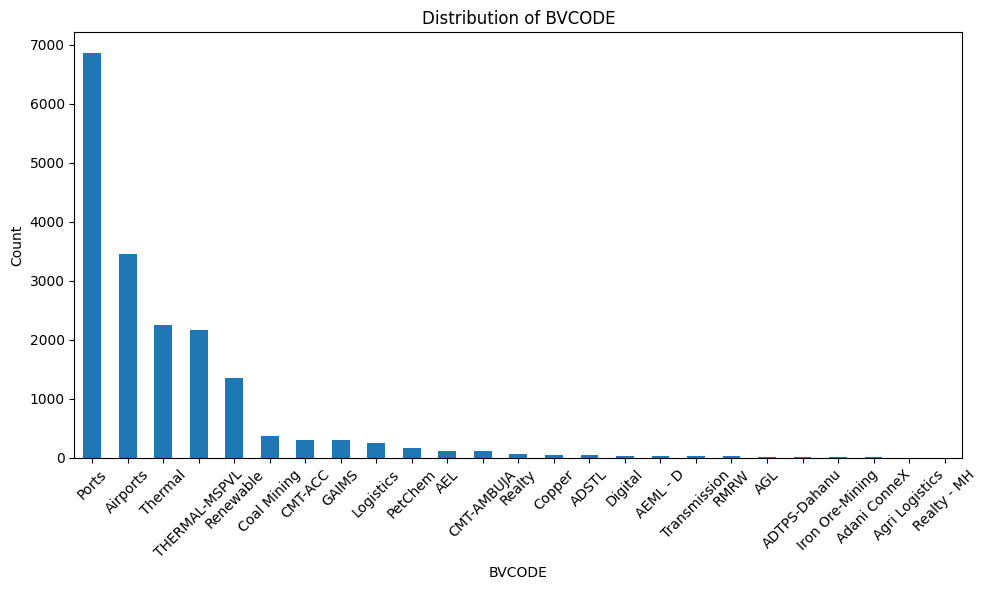


Value counts for BUNAME:
BUNAME
Ports & Logistics        7123
Energy                   5809
Airports                 3452
Natural Resources         431
Cement                    407
Health Care               296
Emerging                  164
Adani Enterprises Ltd     160
Real Estate                63
Defence                    40
Mumbai GTD                 39
Gas                        15
Name: count, dtype: int64


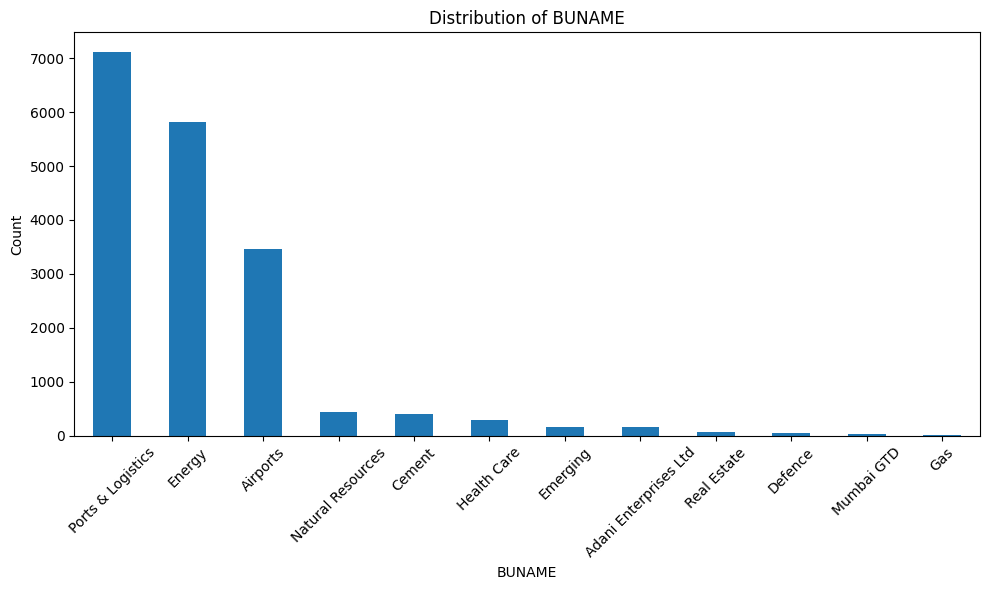


Value counts for SICODE:
SICODE
APSEZ_Mundra         3104
Mundra               2213
Ahmedabad            1336
Dhamra               1189
AKBTPL_Kandla         919
                     ... 
Bagewadi                1
Kudithini               1
Kaithal                 1
132kV GSS Khatoti       1
Jhansi                  1
Name: count, Length: 183, dtype: int64


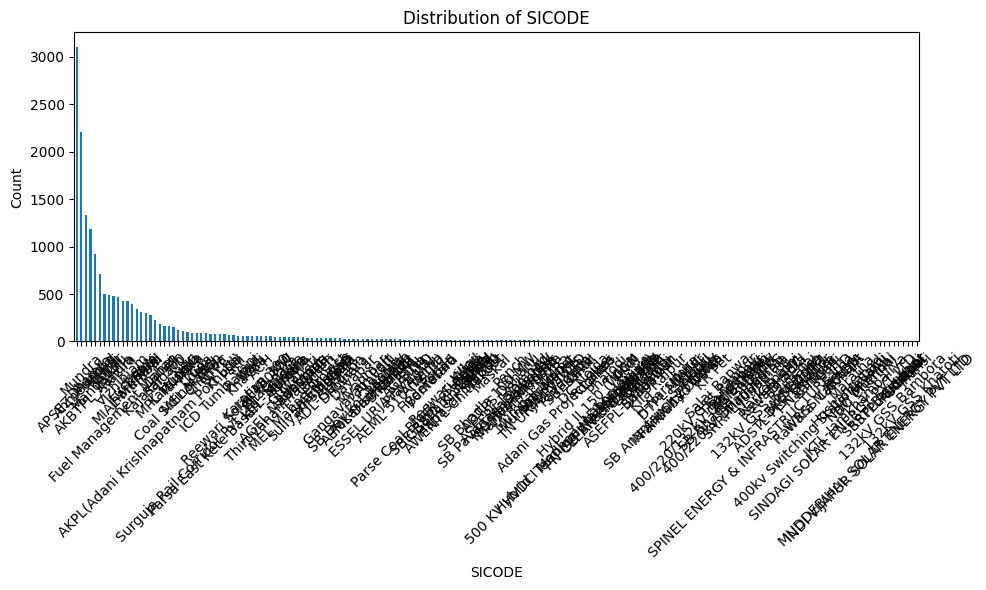


Value counts for LMCODE:
LMCODE
Central Zone                    939
Arrival                         806
MPT                             643
MSB                             624
Port Gate                       617
                               ... 
IBP                               1
Shoppers Plaza Junction          1
T1 Terminal Managment Office      1
Isolation Bay                     1
Invertor -15                      1
Name: count, Length: 1166, dtype: int64


<ipython-input-5-081e5db225ea>:55: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
<ipython-input-5-081e5db225ea>:55: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.tight_layout()
<ipython-input-5-081e5db225ea>:55: UserWarning: Glyph 148 (\x94) missing from current font.
  plt.tight_layout()
<ipython-input-5-081e5db225ea>:55: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

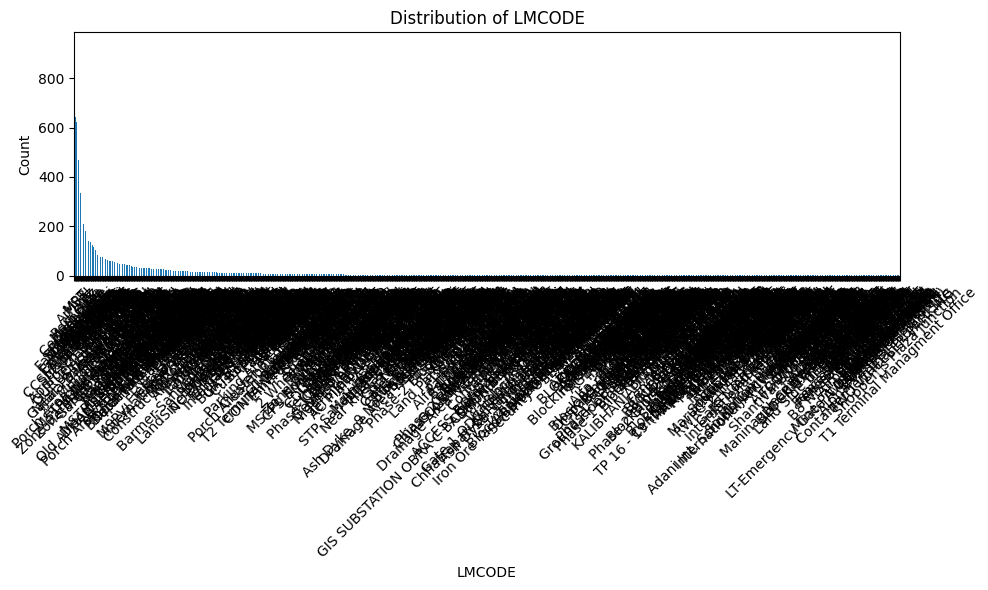


Value counts for INCIDENTTYPECODE:
INCIDENTTYPECODE
Sec Inc                10150
Non Sec Opr             3898
Non Sec Inc Oth         2717
Non Sec Inc - IR/PR     1234
Name: count, dtype: int64


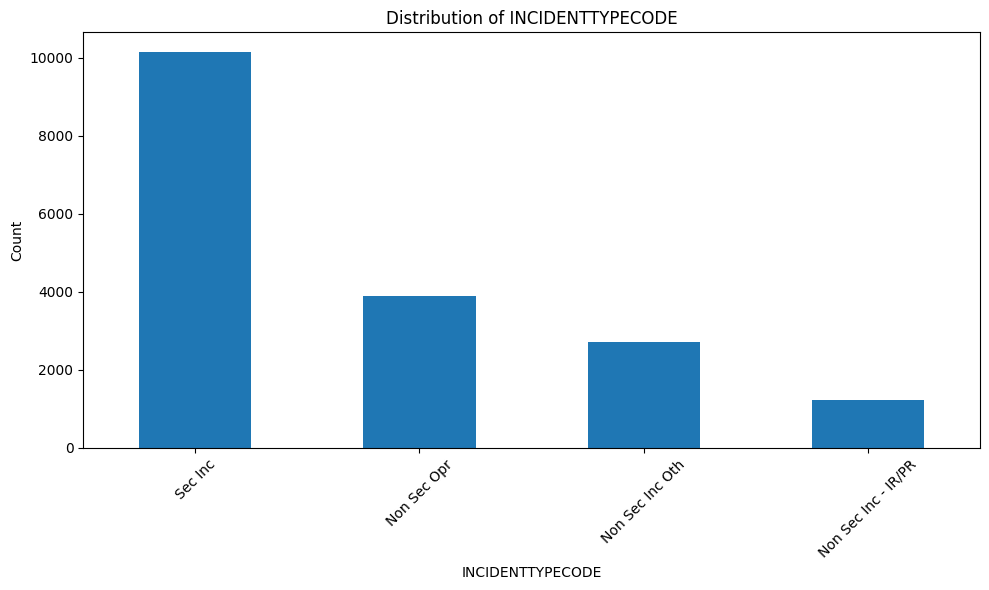


Value counts for INCIDENTCATCODE:
INCIDENTCATCODE
Asset/Property                      3117
Others                              2550
Fraud/Malpractice                   2222
Any Other                           2163
Traffic                             1344
Work Site - No Injury                986
Fire or Explosion                    986
PR - Villagers/ Neighborhood         758
Offsite Incidents                    715
Incidents against personnel          631
Work Site  FAC                      470
IR - Worker/ Union/ Transporters     430
Illness Case                         362
Unsafe Act                           307
Material                             286
Work Site  MTC                      225
Near Miss                            165
Unsafe Condition                      99
Natural Calamities                    51
Leaks                                 48
PR - Political/ Social                46
Work Site  Fatal                     24
Spillage                              14
Name: 

<ipython-input-5-081e5db225ea>:55: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


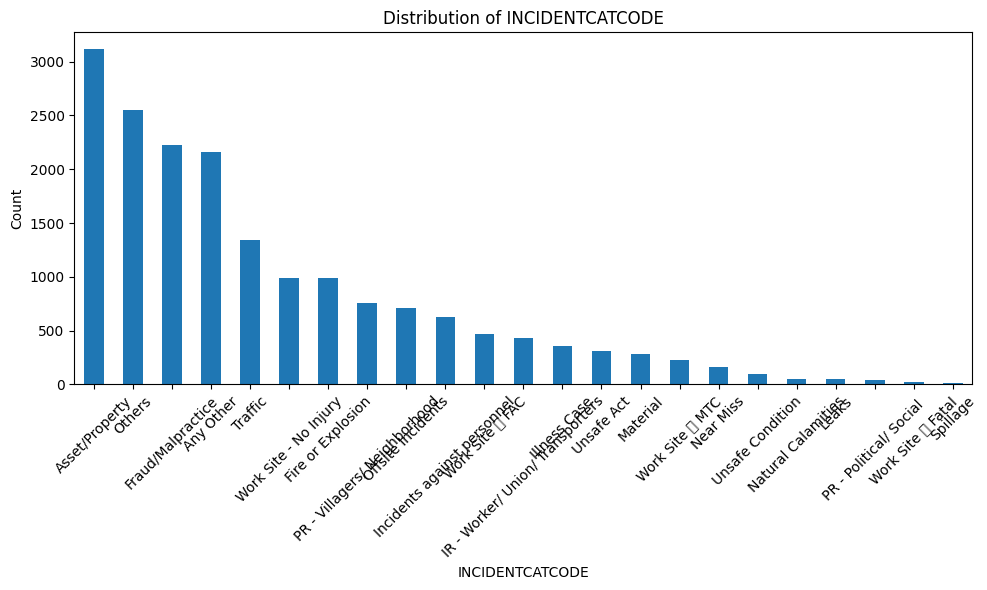

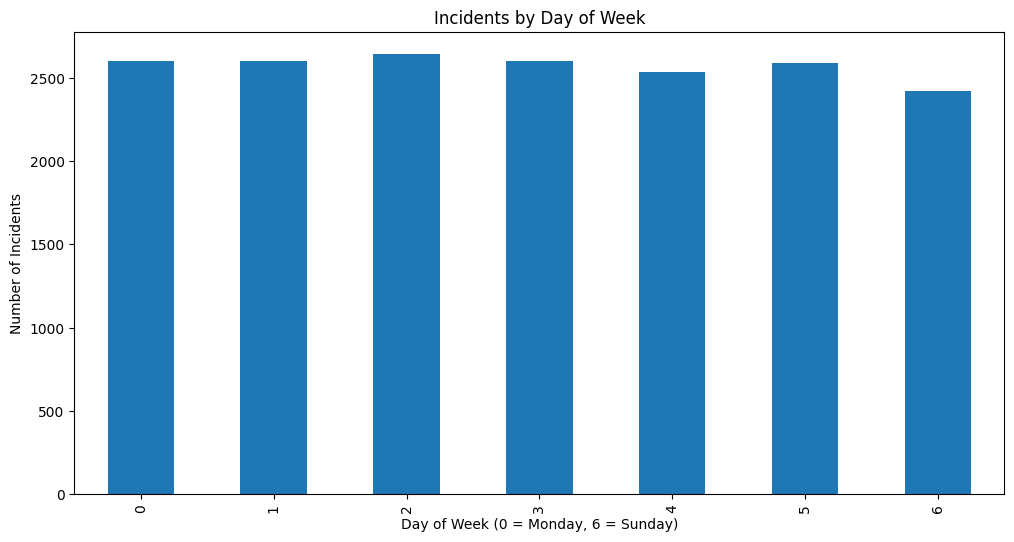

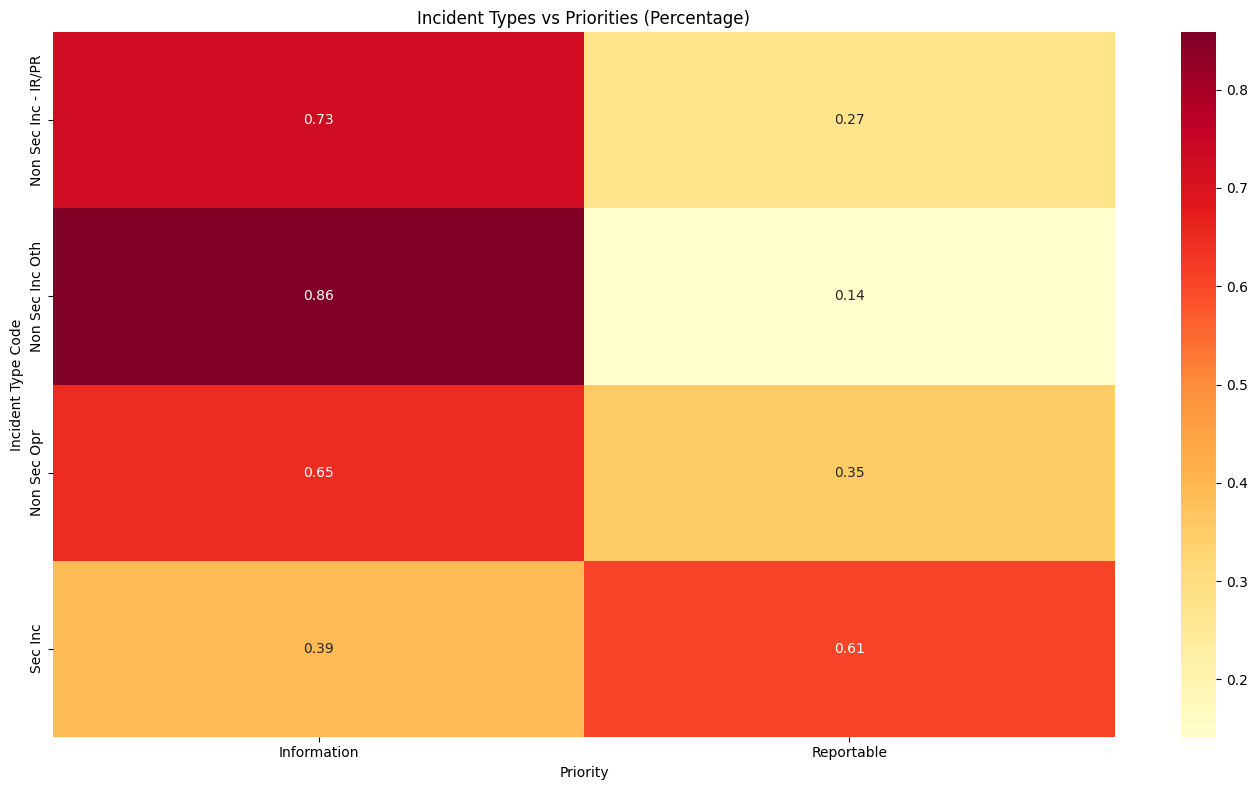

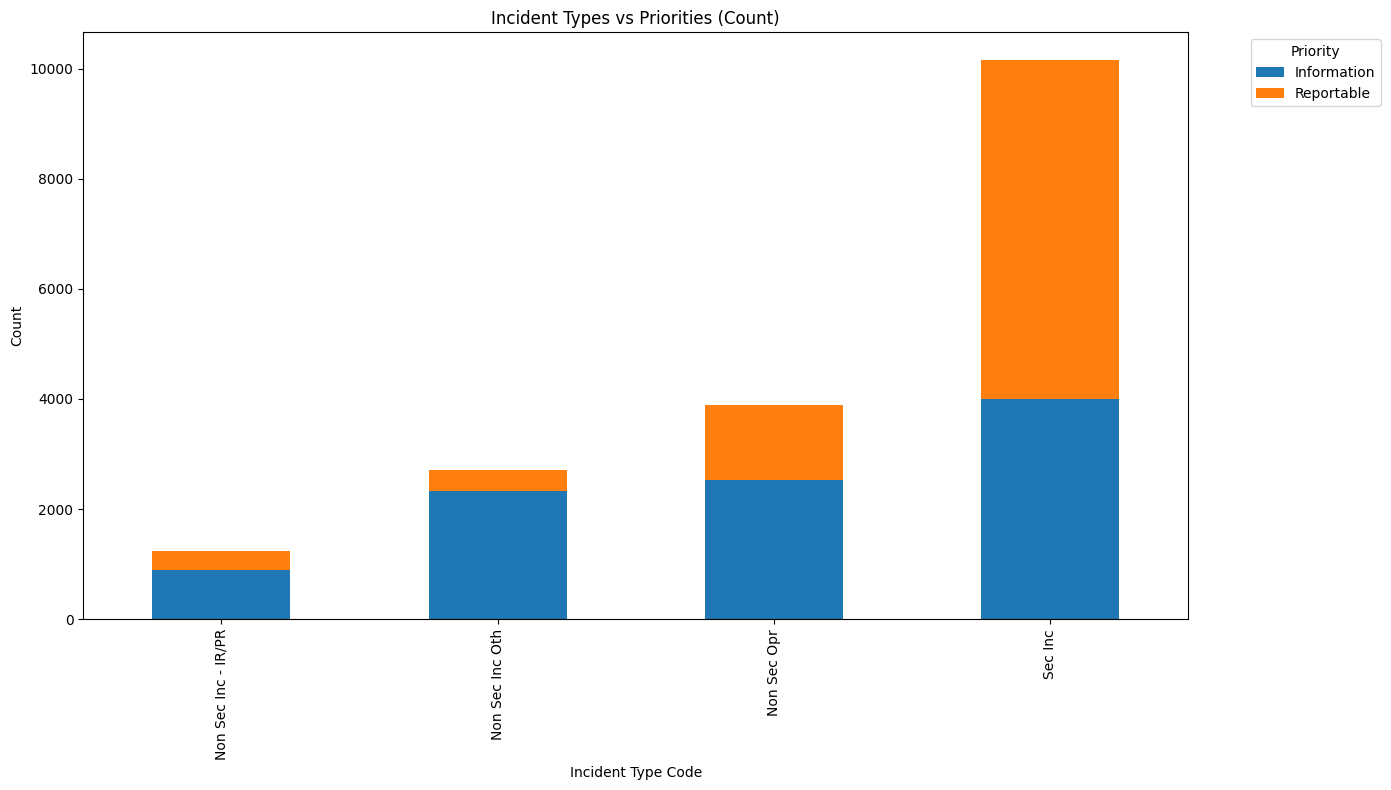

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
# Read the CSV file
df = pd.read_csv('/adani_data.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nFirst few rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

# Function to parse dates with error handling
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='mixed', dayfirst=True)
    except ValueError:
        print(f"Warning: Unable to parse date '{date_str}'. Setting to NaT.")
        return pd.NaT

# Convert date columns to datetime type
date_columns = ['OCCUREDDATE', 'REPORTEDDATE', 'LASTUPDATEDDATE']
for col in date_columns:
    df[col] = df[col].apply(parse_date)

# Check for any remaining NaT values
for col in date_columns:
    nat_count = df[col].isna().sum()
    if nat_count > 0:
        print(f"Warning: {nat_count} NaT values in {col}")

# Proceed with the rest of the analysis only if we have valid date data
if df[date_columns].notna().all(axis=1).any():
    # Analyze categorical columns
    categorical_columns = ['PRIORITY', 'BVCODE', 'BUNAME', 'SICODE', 'LMCODE', 'INCIDENTTYPECODE', 'INCIDENTCATCODE']

    for col in categorical_columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

        # Create a bar plot
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Analyze time-related patterns
    df['Hour'] = df['OCCUREDDATE'].dt.hour
    df['DayOfWeek'] = df['OCCUREDDATE'].dt.dayofweek

    # # Plot incidents by hour
    # plt.figure(figsize=(12, 6))
    # df['Hour'].value_counts().sort_index().plot(kind='bar')
    # plt.title('Incidents by Hour of Day')
    # plt.xlabel('Hour')
    # plt.ylabel('Number of Incidents')
    # plt.show()

    # Plot incidents by day of week
    plt.figure(figsize=(12, 6))
    df['DayOfWeek'].value_counts().sort_index().plot(kind='bar')
    plt.title('Incidents by Day of Week')
    plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
    plt.ylabel('Number of Incidents')
    plt.show()

    # # Analyze relationships between variables
    # numerical_columns = df.select_dtypes(include=[np.number]).columns
    # plt.figure(figsize=(12, 10))
    # sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
    # plt.title('Correlation Heatmap')
    # plt.show()

    # # Create a scatter plot of PRIORITY vs INCIDENTTYPECODE
    # plt.figure(figsize=(12, 6))
    # sns.scatterplot(data=df, x='INCIDENTTYPECODE', y='PRIORITY')
    # plt.title('PRIORITY vs INCIDENTTYPECODE')
    # plt.xticks(rotation=45)
    # plt.show()

    # # Analyze time differences
    # df['ReportingDelay'] = df['REPORTEDDATE'] - df['OCCUREDDATE']

    # # Plot distribution of reporting delays
    # plt.figure(figsize=(12, 6))
    # sns.histplot(df['ReportingDelay'].dt.total_seconds() / 3600, bins=50)
    # plt.title('Distribution of Reporting Delays')
    # plt.xlabel('Delay (hours)')
    # plt.show()

    # # Additional analysis: Incident resolution time
    # df['ResolutionTime'] = df['LASTUPDATEDDATE'] - df['REPORTEDDATE']

    # # Plot distribution of resolution times
    # plt.figure(figsize=(12, 6))
    # sns.histplot(df['ResolutionTime'].dt.total_seconds() / 3600, bins=50)
    # plt.title('Distribution of Resolution Times')
    # plt.xlabel('Resolution Time (hours)')
    # plt.show()

    # # Analyze priority vs resolution time
    # plt.figure(figsize=(12, 6))
    # sns.boxplot(x='PRIORITY', y=df['ResolutionTime'].dt.total_seconds() / 3600, data=df)
    # plt.title('Resolution Time by Priority')
    # plt.xlabel('Priority')
    # plt.ylabel('Resolution Time (hours)')
    # plt.show()

    # # Analyze incident type vs resolution time
    # plt.figure(figsize=(14, 6))
    # sns.boxplot(x='INCIDENTTYPECODE', y=df['ResolutionTime'].dt.total_seconds() / 3600, data=df)
    # plt.title('Resolution Time by Incident Type')
    # plt.xlabel('Incident Type Code')
    # plt.ylabel('Resolution Time (hours)')
    # plt.xticks(rotation=45)
    # plt.show()

    # # Time series analysis of incidents
    # df['Date'] = df['OCCUREDDATE'].dt.date
    # daily_incidents = df.groupby('Date').size().reset_index(name='Count')

    # plt.figure(figsize=(16, 6))
    # plt.plot(daily_incidents['Date'], daily_incidents['Count'])
    # plt.title('Daily Incident Count Over Time')
    # plt.xlabel('Date')
    # plt.ylabel('Number of Incidents')
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()

    # NEW ADDITION: Analyze relationship between incident types and priorities
    plt.figure(figsize=(14, 8))
    incident_priority = pd.crosstab(df['INCIDENTTYPECODE'], df['PRIORITY'])
    incident_priority_percentage = incident_priority.div(incident_priority.sum(axis=1), axis=0)
    sns.heatmap(incident_priority_percentage, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title('Incident Types vs Priorities (Percentage)')
    plt.xlabel('Priority')
    plt.ylabel('Incident Type Code')
    plt.tight_layout()
    plt.show()

    # Stacked bar chart for incident types and priorities
    incident_priority.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title('Incident Types vs Priorities (Count)')
    plt.xlabel('Incident Type Code')
    plt.ylabel('Count')
    plt.legend(title='Priority', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print("Error: No valid date data available for analysis.")

In [ ]:
# !pip install pmdarima
!pip install prophet
# !pip install tbats
# !pip install statsmodels

# **INCIDENT FREQUENCY FORECAST**

<ipython-input-43-37a240809206>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['OCCUREDDATE'] = pd.to_datetime(data['OCCUREDDATE'])
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56hoch0g/4qsu54cc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56hoch0g/1p70pz85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8836', 'data', 'file=/tmp/tmp56hoch0g/4qsu54cc.json', 'init=/tmp/tmp56hoch0g/1p70pz85.json', 'output', 'file=/tmp/tmp56hoch0g/prophet_modelfu

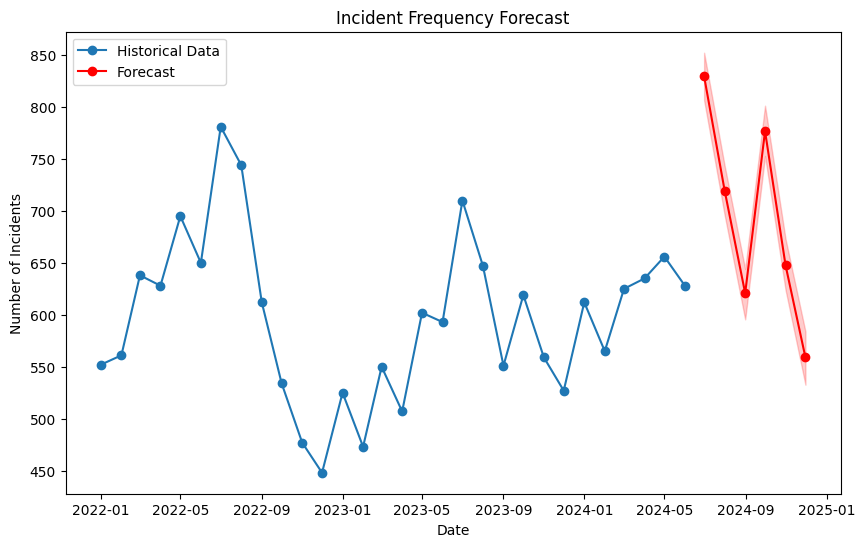

           ds        yhat  yhat_lower  yhat_upper
30 2024-06-30  829.577459  806.526178  852.249585
31 2024-07-31  719.599980  696.137254  743.531861
32 2024-08-31  620.767086  595.597448  644.114552
33 2024-09-30  776.763713  752.808944  801.280672
34 2024-10-31  647.607065  624.003756  672.952858
35 2024-11-30  559.001356  532.721229  583.964628


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('/adani_data.csv')

# Parse dates
data['OCCUREDDATE'] = pd.to_datetime(data['OCCUREDDATE'])

# Remove entries for July 2024
data = data[data['OCCUREDDATE'].dt.to_period('M') != pd.Period('2024-07')]

# Aggregate data to a monthly frequency
data['month'] = data['OCCUREDDATE'].dt.to_period('M')
monthly_data = data.groupby('month').size().reset_index(name='incidents')

# Prepare the data for Prophet
monthly_data['month'] = monthly_data['month'].dt.to_timestamp()
monthly_data.columns = ['ds', 'y']

# Fit the Prophet model
model = Prophet()
model.fit(monthly_data)

# Create a DataFrame to hold predictions for the next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['ds'], monthly_data['y'], label='Historical Data', marker='o')

# Plot the forecasted data
forecast_dates = forecast['ds'][-6:]
forecast_values = forecast['yhat'][-6:]
plt.plot(forecast_dates, forecast_values, 'r', label='Forecast', marker='o')

# Fill the forecast confidence interval
plt.fill_between(forecast_dates, forecast['yhat_lower'][-6:], forecast['yhat_upper'][-6:], color='red', alpha=0.2)

# Add labels and title
plt.title('Incident Frequency Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()

# Display the plot
plt.show()

# Print forecasted values for the next 6 months
forecast_results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)
print(forecast_results)


# **PRIORITY BASED**

<ipython-input-63-d8648efccabc>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['OCCUREDDATE'] = pd.to_datetime(df['OCCUREDDATE'])


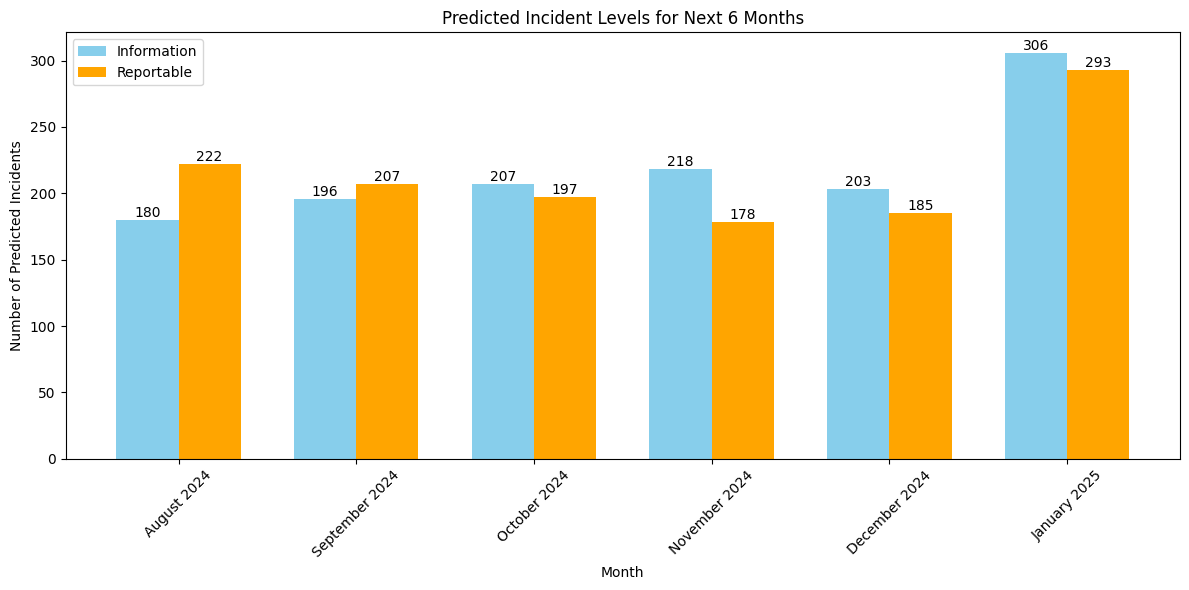

Predicted Incident Counts for Next 6 Months:
   YEAR  MONTH  Information  Reportable
0  2024      8          180         222
1  2024      9          196         207
2  2024     10          207         197
3  2024     11          218         178
4  2024     12          203         185
5  2025      1          306         293


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load the data (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('/adani_data.csv')

# Preprocess the data
df['OCCUREDDATE'] = pd.to_datetime(df['OCCUREDDATE'])
df['MONTH'] = df['OCCUREDDATE'].dt.month
df['YEAR'] = df['OCCUREDDATE'].dt.year

# Encode categorical variables
le = LabelEncoder()
df['PRIORITY'] = le.fit_transform(df['PRIORITY'].astype(str))

# Group by month and year, count incidents
monthly_incidents = df.groupby(['YEAR', 'MONTH', 'PRIORITY']).size().unstack(fill_value=0).reset_index()
monthly_incidents.columns = ['YEAR', 'MONTH', 'Information', 'Reportable']

# Prepare features for prediction
X = monthly_incidents[['YEAR', 'MONTH']]
y_info = monthly_incidents['Information']
y_report = monthly_incidents['Reportable']

# Create and train the Random Forest models
rf_model_info = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_report = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_info.fit(X, y_info)
rf_model_report.fit(X, y_report)

# Generate data for the next 6 months
last_date = df['OCCUREDDATE'].max()
next_6_months = [last_date + timedelta(days=30*i) for i in range(1, 7)]
predict_df = pd.DataFrame({
    'YEAR': [date.year for date in next_6_months],
    'MONTH': [date.month for date in next_6_months]
})

# Make predictions
predict_df['Information'] = rf_model_info.predict(predict_df[['YEAR', 'MONTH']]).round().astype(int)
predict_df['Reportable'] = rf_model_report.predict(predict_df[['YEAR', 'MONTH']]).round().astype(int)

# Create the bar graph for predicted incidents
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(next_6_months))
width = 0.35

ax.bar([i - width/2 for i in x], predict_df['Information'], width, label='Information', color='skyblue')
ax.bar([i + width/2 for i in x], predict_df['Reportable'], width, label='Reportable', color='orange')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Predicted Incidents')
ax.set_title('Predicted Incident Levels for Next 6 Months')
ax.set_xticks(x)
ax.set_xticklabels([date.strftime('%B %Y') for date in next_6_months])
ax.legend()

# Add value labels on top of each bar
for i in x:
    ax.text(i - width/2, predict_df['Information'][i], f'{predict_df["Information"][i]}',
            ha='center', va='bottom')
    ax.text(i + width/2, predict_df['Reportable'][i], f'{predict_df["Reportable"][i]}',
            ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the predicted incident counts
print("Predicted Incident Counts for Next 6 Months:")
print(predict_df[['YEAR', 'MONTH', 'Information', 'Reportable']])

# **INCIDENT CATEGORY BASED**

First few rows of the dataset:
      PRIORITY OCCUREDDATE REPORTEDDATE LASTUPDATEDDATE    BVCODE    BUNAME  \
0  Information  14-03-2023   17-03-2023      17-03-2023  Airports  Airports   
1  Information  09-07-2023   11-07-2023      11-07-2023  Airports  Airports   
2  Information  14-07-2023   14-07-2023      14-07-2023  Airports  Airports   
3   Reportable  12-07-2023   14-07-2023      14-07-2023  Airports  Airports   
4   Reportable  12-07-2023   14-07-2023      14-07-2023  Airports  Airports   

    SICODE                LMCODE INCIDENTTYPECODE INCIDENTCATCODE  
0  Lucknow  CCSI Airport Lucknow          Sec Inc          Others  
1  Lucknow  CCSI Airport Lucknow          Sec Inc          Others  
2  Lucknow  CCSI Airport Lucknow          Sec Inc          Others  
3  Lucknow  CCSI Airport Lucknow          Sec Inc          Others  
4  Lucknow  CCSI Airport Lucknow          Sec Inc          Others  

Column names in the dataset with their lengths:
'PRIORITY' : 8
'OCCUREDDATE' : 11
'RE

<ipython-input-13-c4c2ddae4bdd>:120: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_df_encoded[col] = 0
<ipython-input-13-c4c2ddae4bdd>:120: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_df_encoded[col] = 0
<ipython-input-13-c4c2ddae4bdd>:120: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Monthly predictions for the next 6 months:
Predicted_Category  Any Other  Asset/Property  Fire or Explosion  \
OCCUREDDATE                                                        
2025-01                     5               5                  1   
2025-02                     3               2                  3   
2025-03                     5               4                  4   
2025-04                     3               5                  3   
2025-05                     3               3                  7   
2025-06                     4               6                  4   

Predicted_Category  Fraud/Malpractice  IR - Worker/ Union/ Transporters  \
OCCUREDDATE                                                               
2025-01                             0                                 4   
2025-02                             0                                 2   
2025-03                             0                                 3   
2025-04                             

<ipython-input-13-c4c2ddae4bdd>:142: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


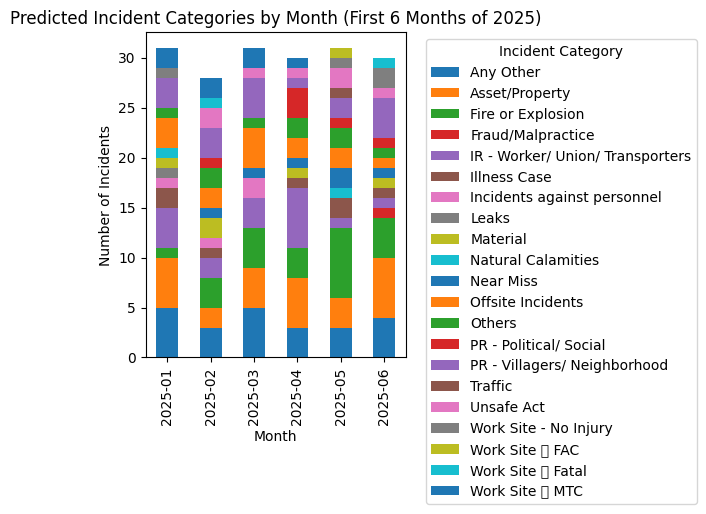


Total predicted incidents per month:
OCCUREDDATE
2025-01    31
2025-02    28
2025-03    31
2025-04    30
2025-05    31
2025-06    30
Freq: M, dtype: int64

Total predicted incidents per category over 6 months:
Predicted_Category
Any Other                           23
Asset/Property                      25
Fire or Explosion                   22
Fraud/Malpractice                    1
IR - Worker/ Union/ Transporters    17
Illness Case                         7
Incidents against personnel          4
Leaks                                1
Material                             5
Natural Calamities                   2
Near Miss                            6
Offsite Incidents                   14
Others                               9
PR - Political/ Social               6
PR - Villagers/ Neighborhood        17
Traffic                              1
Unsafe Act                           7
Work Site - No Injury                4
Work Site  FAC                      1
Work Site  Fatal            

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/adani_data.csv', encoding='utf-8')

# Inspect the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Print the column names and their lengths to diagnose issues
print("\nColumn names in the dataset with their lengths:")
for col in df.columns:
    print(f"'{col}' : {len(col)}")

# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

# Print the column names again to verify
print("\nColumn names after stripping spaces:")
print(df.columns)

# Print column names with repr()
print("\nColumn names with repr():")
print([repr(col) for col in df.columns])

# Check if 'INCIDENTCATCODE' exists in the DataFrame
if 'INCIDENTCATCODE' in df.columns:
    print("\n'INCIDENTCATCODE' column exists in the DataFrame.")
    # Print unique values in 'INCIDENTCATCODE' to ensure it contains valid data
    print("\nUnique values in 'INCIDENTCATCODE':")
    print(df['INCIDENTCATCODE'].unique())
else:
    print("\nError: 'INCIDENTCATCODE' not found in the DataFrame.")

# Continue with the rest of the data preparation and model training if the column exists
if 'INCIDENTCATCODE' in df.columns:
    # Function to parse dates with multiple formats
    def parse_date(date_str):
        try:
            return pd.to_datetime(date_str, format='%d-%m-%Y')
        except ValueError:
            try:
                return pd.to_datetime(date_str)
            except ValueError:
                return pd.NaT

    # Data Preparation and Feature Engineering
    date_columns = ['REPORTEDDATE', 'LASTUPDATEDDATE', 'OCCUREDDATE']
    for col in date_columns:
        df[col] = df[col].apply(parse_date)

    df['Day_of_Week'] = df['OCCUREDDATE'].dt.dayofweek
    df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

    # Encode categorical variables
    categorical_cols = ['PRIORITY', 'BVCODE', 'BUNAME', 'SICODE', 'LMCODE', 'INCIDENTTYPECODE']
    df_encoded = pd.get_dummies(df, columns=categorical_cols)

    # Check if 'INCIDENTCATCODE' is still in df_encoded
    print("\nChecking if 'INCIDENTCATCODE' is in df_encoded:")
    print('INCIDENTCATCODE' in df_encoded.columns)

    # If 'INCIDENTCATCODE' is not in df_encoded, add it back
    if 'INCIDENTCATCODE' not in df_encoded.columns:
        df_encoded['INCIDENTCATCODE'] = df['INCIDENTCATCODE']

    # Encode the target variable
    le = LabelEncoder()
    df_encoded['INCIDENTCATCODE'] = le.fit_transform(df_encoded['INCIDENTCATCODE'])

    # Prepare features and target
    X = df_encoded.drop(['INCIDENTCATCODE', 'REPORTEDDATE', 'LASTUPDATEDDATE', 'OCCUREDDATE'], axis=1)
    y = df_encoded['INCIDENTCATCODE']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Model Evaluation
    y_pred = rf_model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Feature importance
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
    print("\nTop 10 Feature Importances:")
    print(feature_importance.head(10))

    # Predicting Future Incidents
    future_dates = pd.date_range(start='2025-01-01', end='2025-06-30')
    future_df = pd.DataFrame({'OCCUREDDATE': future_dates})
    future_df['Day_of_Week'] = future_df['OCCUREDDATE'].dt.dayofweek
    future_df['Is_Weekend'] = future_df['Day_of_Week'].isin([5, 6]).astype(int)

    # Add required columns with default or random values
    for col in categorical_cols:
        future_df[col] = np.random.choice(df[col].unique(), size=len(future_df))

    future_df_encoded = pd.get_dummies(future_df, columns=categorical_cols)

    # Align future_df_encoded with X columns
    for col in X.columns:
        if col not in future_df_encoded.columns:
            future_df_encoded[col] = 0

    future_df_encoded = future_df_encoded[X.columns]

    # Add some randomness to predictions to avoid constant categories
    future_predictions = rf_model.predict_proba(future_df_encoded)
    future_df['Predicted_Category'] = le.inverse_transform([np.random.choice(len(rf_model.classes_), p=probs) for probs in future_predictions])

    # Group by month and count incidents per category
    monthly_predictions = future_df.groupby([future_df['OCCUREDDATE'].dt.to_period('M'), 'Predicted_Category']).size().unstack(fill_value=0)

    # Print monthly predictions
    print("\nMonthly predictions for the next 6 months:")
    print(monthly_predictions)

    # Visualize monthly predictions
    plt.figure(figsize=(14, 8))
    monthly_predictions.plot(kind='bar', stacked=True)
    plt.title('Predicted Incident Categories by Month (First 6 Months of 2025)')
    plt.xlabel('Month')
    plt.ylabel('Number of Incidents')
    plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print total incidents per month
    print("\nTotal predicted incidents per month:")
    print(monthly_predictions.sum(axis=1))

    # Print total incidents per category over 6 months
    print("\nTotal predicted incidents per category over 6 months:")
    print(monthly_predictions.sum())

else:
    print("Cannot proceed with model training due to missing 'INCIDENTCATCODE' column.")

# **INCIDENT TYPE**

Distribution of INCIDENTTYPECODE:
Sec Inc: 56.39%
Non Sec Opr: 21.66%
Non Sec Inc Oth: 15.10%
Non Sec Inc - IR/PR: 6.86%

Random Forest Performance:
                     precision    recall  f1-score   support

Non Sec Inc - IR/PR       0.97      0.98      0.97       254
    Non Sec Inc Oth       0.89      0.95      0.92       522
        Non Sec Opr       0.98      0.93      0.95       813
            Sec Inc       0.99      0.99      0.99      2011

           accuracy                           0.97      3600
          macro avg       0.96      0.96      0.96      3600
       weighted avg       0.97      0.97      0.97      3600


Cross-validation scores: [0.9688888888888889, 0.9672222222222222, 0.9647222222222223, 0.9663888888888889, 0.9661016949152542]
Mean CV score: 0.9666647834274953


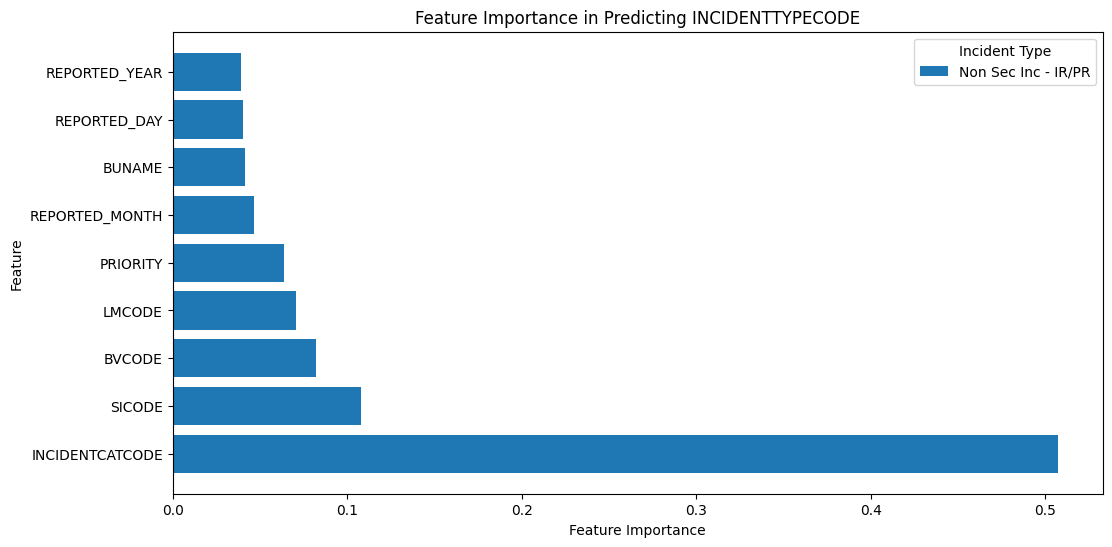


Top 10 Feature Importances:
           feature  importance
0  INCIDENTCATCODE    0.507421
1           SICODE    0.108075
2           BVCODE    0.082077
3           LMCODE    0.070662
4         PRIORITY    0.063874
5   REPORTED_MONTH    0.046773
6           BUNAME    0.041580
7     REPORTED_DAY    0.040323
8    REPORTED_YEAR    0.039215


<Figure size 1500x800 with 0 Axes>

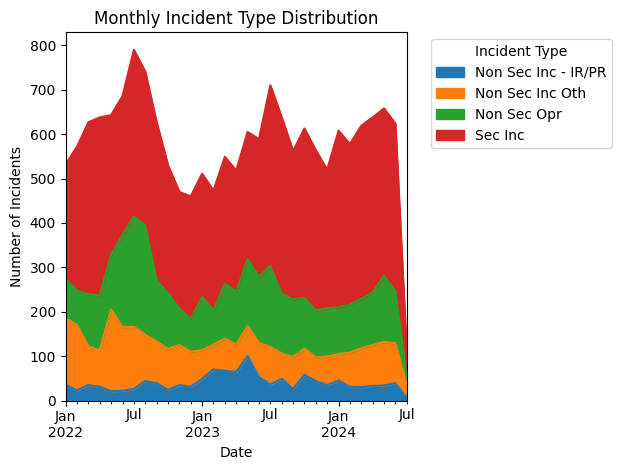

<Figure size 1000x600 with 0 Axes>

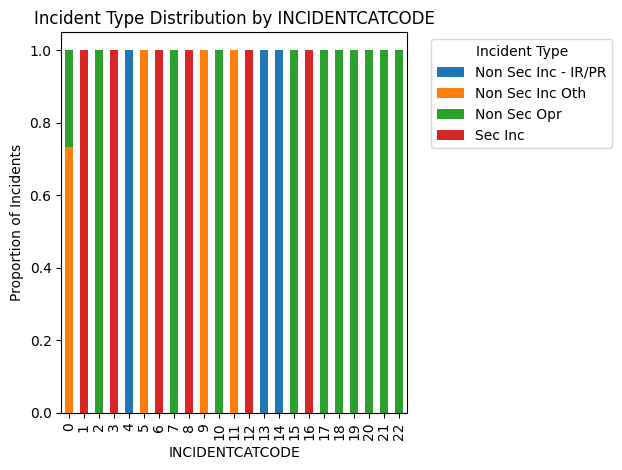

<Figure size 1000x600 with 0 Axes>

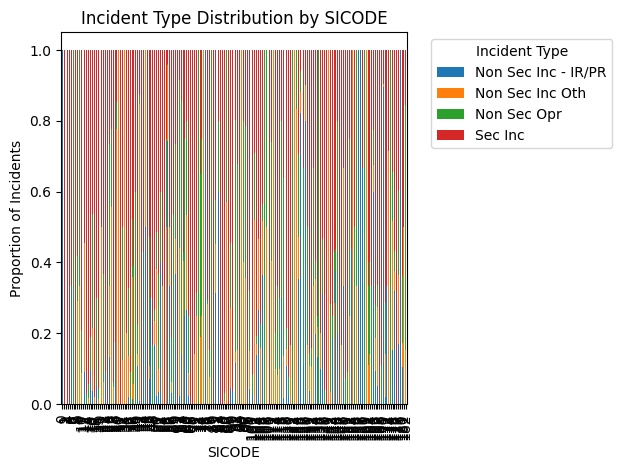

<Figure size 1000x600 with 0 Axes>

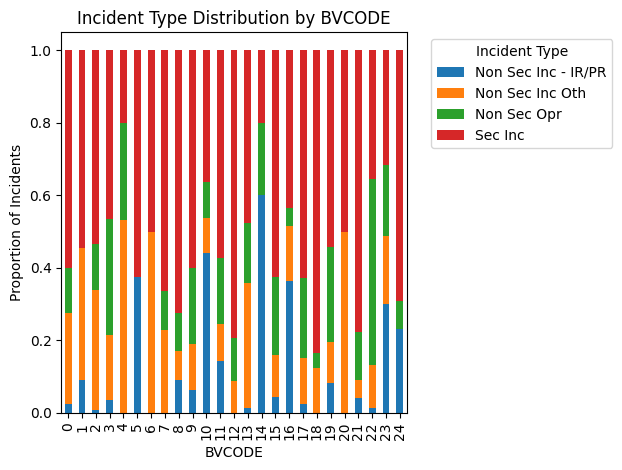

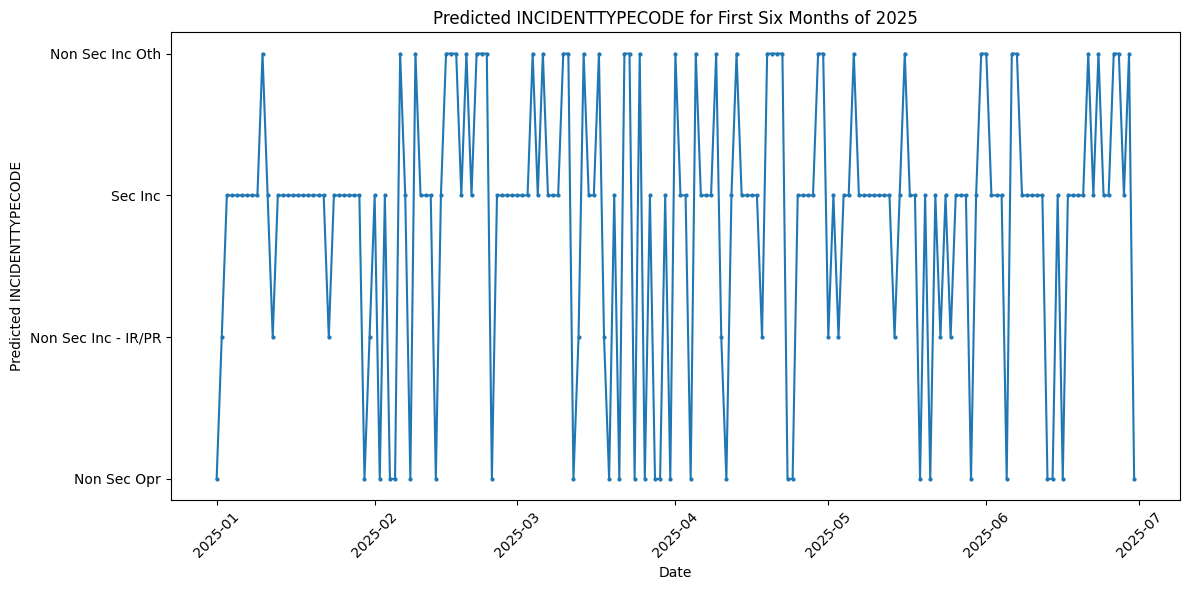


Random Forest Prediction Distribution:
Sec Inc: 55.25%
Non Sec Inc Oth: 22.10%
Non Sec Opr: 15.47%
Non Sec Inc - IR/PR: 7.18%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/adani_data.csv')

# Convert date columns to datetime format
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y')
    except ValueError:
        try:
            return pd.to_datetime(date_str)
        except ValueError:
            return pd.NaT

date_columns = ['REPORTEDDATE', 'LASTUPDATEDDATE', 'OCCUREDDATE']
for col in date_columns:
    data[col] = data[col].apply(parse_date)

# Extract features from dates
data['REPORTED_YEAR'] = data['REPORTEDDATE'].dt.year
data['REPORTED_MONTH'] = data['REPORTEDDATE'].dt.month
data['REPORTED_DAY'] = data['REPORTEDDATE'].dt.day

# Handle missing values
numeric_features = ['REPORTED_YEAR', 'REPORTED_MONTH', 'REPORTED_DAY']
categorical_features = ['PRIORITY', 'BVCODE', 'BUNAME', 'SICODE', 'LMCODE', 'INCIDENTCATCODE']

for col in numeric_features:
    data[col] = data[col].fillna(data[col].median())

for col in categorical_features:
    data[col] = data[col].fillna('Unknown')

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Encode target variable
target_encoder = LabelEncoder()
data['INCIDENTTYPECODE'] = target_encoder.fit_transform(data['INCIDENTTYPECODE'].astype(str))

# Create a dictionary to map encoded values to original labels
incident_type_map = dict(enumerate(target_encoder.classes_))

# Check distribution of INCIDENTTYPECODE
print("Distribution of INCIDENTTYPECODE:")
distribution = data['INCIDENTTYPECODE'].value_counts(normalize=True)
for code, proportion in distribution.items():
    print(f"{incident_type_map[code]}: {proportion:.2%}")

# Select features for the model
features = numeric_features + categorical_features
X = data[features]
y = data['INCIDENTTYPECODE']

# Ensure no missing values in the feature set
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame to retain column names
X = pd.DataFrame(X_imputed, columns=features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the Random Forest model
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_pred, target_names=[incident_type_map[i] for i in range(len(incident_type_map))]))

# Use StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate model using cross-validation
cv_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    rf_model.fit(X_train_resampled, y_train_resampled)
    cv_scores.append(rf_model.score(X_test, y_test))

print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

# Plot feature importance for Random Forest
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting INCIDENTTYPECODE')
plt.legend(labels=[incident_type_map[i] for i in range(len(incident_type_map))], title='Incident Type')
plt.show()

print("\nTop 10 Feature Importances:")
print(feature_importance_df.head(10))

# Analyze temporal trends
monthly_incidents = data.groupby([data['REPORTEDDATE'].dt.to_period('M'), 'INCIDENTTYPECODE']).size().unstack(fill_value=0)
monthly_incidents.columns = [incident_type_map[col] for col in monthly_incidents.columns]

plt.figure(figsize=(15, 8))
monthly_incidents.plot(kind='area', stacked=True)
plt.title('Monthly Incident Type Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyze relationship between top features and incident types
data['INCIDENTTYPECODE_LABEL'] = data['INCIDENTTYPECODE'].map(incident_type_map)
top_features = feature_importance_df['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(10, 6))
    data.groupby(feature)['INCIDENTTYPECODE_LABEL'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.title(f'Incident Type Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion of Incidents')
    plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Generate future predictions
future_dates = pd.date_range(start='2025-01-01', end='2025-06-30', freq='D')

# Use a more sophisticated method for generating future data
future_data = pd.DataFrame({
    'REPORTED_YEAR': future_dates.year,
    'REPORTED_MONTH': future_dates.month,
    'REPORTED_DAY': future_dates.day
})

for col in categorical_features:
    # Use the distribution of the original data instead of mode
    value_counts = data[col].value_counts(normalize=True)
    future_data[col] = np.random.choice(value_counts.index, size=len(future_dates), p=value_counts.values)

# Ensure no missing values in the future data
future_data_imputed = imputer.transform(future_data)

# Convert back to DataFrame to retain column names
future_data = pd.DataFrame(future_data_imputed, columns=features)

# Make predictions using Random Forest model
rf_future_predictions = rf_model.predict(future_data)

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, [incident_type_map[pred] for pred in rf_future_predictions], marker='o', linestyle='-', markersize=2)
plt.xlabel('Date')
plt.ylabel('Predicted INCIDENTTYPECODE')
plt.title('Predicted INCIDENTTYPECODE for First Six Months of 2025')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print prediction distribution
print("\nRandom Forest Prediction Distribution:")
prediction_distribution = pd.Series([incident_type_map[pred] for pred in rf_future_predictions]).value_counts(normalize=True)
for incident_type, proportion in prediction_distribution.items():
    print(f"{incident_type}: {proportion:.2%}")

# **SITE BASED**

Top 10 Sites with the Most Incident Predictions:
Site Code: 22, Site Name: APSEZ_Mundra, Predicted Incidents: 3121, Category: Fraud/Malpractice
Site Code: 117, Site Name: Mundra, Predicted Incidents: 2215, Category: Fire or Explosion
Site Code: 27, Site Name: Ahmedabad, Predicted Incidents: 1352, Category: Others
Site Code: 50, Site Name: Dhamra, Predicted Incidents: 1212, Category: Any Other
Site Code: 19, Site Name: AKBTPL_Kandla, Predicted Incidents: 914, Category: Fraud/Malpractice
Site Code: 111, Site Name: Mangaluru, Predicted Incidents: 701, Category: Any Other
Site Code: 92, Site Name: Kawai, Predicted Incidents: 499, Category: Unsafe Act
Site Code: 77, Site Name: Jaipur, Predicted Incidents: 496, Category: Others
Site Code: 56, Site Name: Fuel Management Mahan, Predicted Incidents: 488, Category: PR - Villagers/ Neighborhood
Site Code: 67, Site Name: Hazira, Predicted Incidents: 452, Category: Fraud/Malpractice


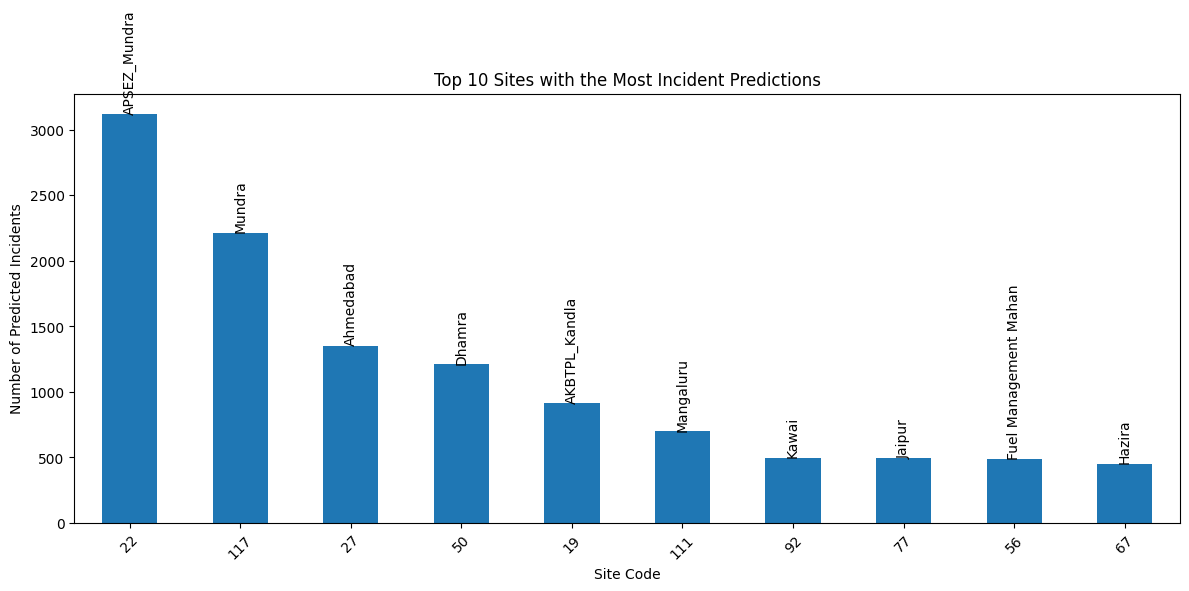

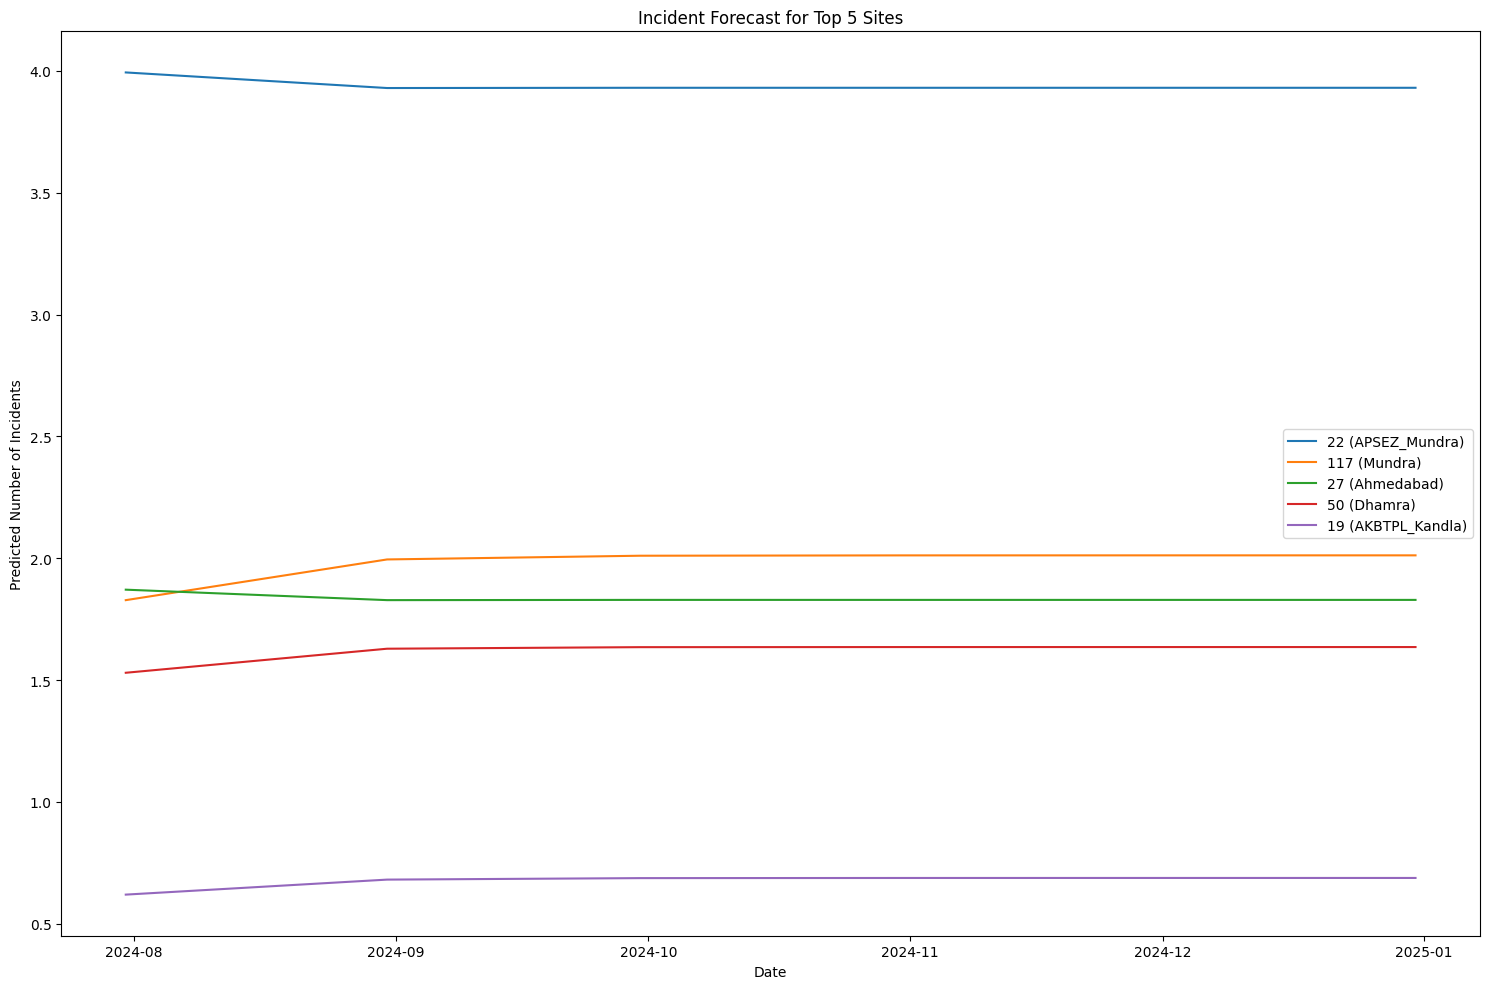


Detailed Predictions for Top 5 Sites:

22 (APSEZ_Mundra):
  2024-07-31: 3.99
  2024-08-31: 3.93
  2024-09-30: 3.93
  2024-10-31: 3.93
  2024-11-30: 3.93
  2024-12-31: 3.93

117 (Mundra):
  2024-07-31: 1.83
  2024-08-31: 2.00
  2024-09-30: 2.01
  2024-10-31: 2.01
  2024-11-30: 2.01
  2024-12-31: 2.01

27 (Ahmedabad):
  2024-07-31: 1.87
  2024-08-31: 1.83
  2024-09-30: 1.83
  2024-10-31: 1.83
  2024-11-30: 1.83
  2024-12-31: 1.83

50 (Dhamra):
  2024-07-31: 1.53
  2024-08-31: 1.63
  2024-09-30: 1.64
  2024-10-31: 1.64
  2024-11-30: 1.64
  2024-12-31: 1.64

19 (AKBTPL_Kandla):
  2024-07-31: 0.62
  2024-08-31: 0.68
  2024-09-30: 0.69
  2024-10-31: 0.69
  2024-11-30: 0.69
  2024-12-31: 0.69


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings("ignore")

# Load and preprocess data
df = pd.read_csv('/adani_data.csv')

# Convert date columns to datetime type and extract useful features
date_columns = ['OCCUREDDATE', 'REPORTEDDATE', 'LASTUPDATEDDATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_dayofweek'] = df[col].dt.dayofweek

# Create new features from date columns
df['REPORT_DELAY'] = (df['REPORTEDDATE'] - df['OCCUREDDATE']).dt.total_seconds() / 3600  # in hours

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['PRIORITY', 'BVCODE', 'BUNAME', 'LMCODE', 'INCIDENTTYPECODE', 'INCIDENTCATCODE', 'SICODE']
encoders = {}
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Create mappings of encoded values to original values
sicode_mapping = dict(zip(encoders['SICODE'].transform(encoders['SICODE'].classes_),
                          encoders['SICODE'].classes_))
incidentcatcode_mapping = dict(zip(encoders['INCIDENTCATCODE'].transform(encoders['INCIDENTCATCODE'].classes_),
                                   encoders['INCIDENTCATCODE'].classes_))

# Split the data into features (X) and target variable (y)
X = df.drop(['SICODE'] + date_columns, axis=1)
y = df['SICODE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the entire dataset
df['predicted_SICODE'] = rf_model.predict(X)

# Count the occurrences of each predicted SICODE
sicode_counts = df['predicted_SICODE'].value_counts()

# Get the top 10 sites with the most incident predictions
top_10_sites = sicode_counts.head(10)

print("Top 10 Sites with the Most Incident Predictions:")
for site, count in top_10_sites.items():
    original_site = sicode_mapping[site]
    category = incidentcatcode_mapping[df[df['predicted_SICODE'] == site]['INCIDENTCATCODE'].mode()[0]]
    print(f"Site Code: {site}, Site Name: {original_site}, Predicted Incidents: {count}, Category: {category}")

# Create a bar plot for top 10 sites
plt.figure(figsize=(12, 6))
top_10_sites.plot(kind='bar')
plt.title('Top 10 Sites with the Most Incident Predictions')
plt.xlabel('Site Code')
plt.ylabel('Number of Predicted Incidents')
plt.xticks(rotation=45)
for i, v in enumerate(top_10_sites):
    plt.text(i, v, f"{sicode_mapping[top_10_sites.index[i]]}", ha='center', va='bottom', rotation=90)
plt.tight_layout()
plt.show()

# Group by date and site, count incidents
incident_counts = df.groupby(['REPORTEDDATE', 'SICODE']).size().unstack(fill_value=0)

# Function to fit ARIMA model and forecast
def forecast_incidents(site_data, steps=6):
    try:
        model = ARIMA(site_data, order=(1,1,1))
        results = model.fit()
        forecast = results.forecast(steps=steps)
        return forecast
    except:
        return pd.Series([np.nan] * steps)

# Forecast for top 10 sites only
forecasts = {}
for site in top_10_sites.index:
    forecasts[site] = forecast_incidents(incident_counts[site])

# Determine which site has most incidents for each future month
future_dates = pd.date_range(start=incident_counts.index[-1] + pd.Timedelta(days=1), periods=6, freq='M')
predicted_counts = pd.DataFrame(index=future_dates, columns=top_10_sites.index)

for site in top_10_sites.index:
    predicted_counts[site] = forecasts[site]

# Plot forecasts for top 5 sites
top_5_sites = predicted_counts.mean().nlargest(5).index
plt.figure(figsize=(15, 10))

for site in top_5_sites:
    forecast = forecasts[site].dropna()
    if not forecast.empty:
        plt.plot(future_dates[:len(forecast)], forecast, label=f"{site} ({sicode_mapping.get(site, 'Unknown')})")

plt.title('Incident Forecast for Top 5 Sites')
plt.xlabel('Date')
plt.ylabel('Predicted Number of Incidents')
plt.legend()
plt.tight_layout()
plt.show()

# Print detailed predictions for top 5 sites
print("\nDetailed Predictions for Top 5 Sites:")
for site in top_5_sites:
    print(f"\n{site} ({sicode_mapping.get(site, 'Unknown')}):")
    for date, count in zip(future_dates, forecasts[site]):
        if not np.isnan(count):
            print(f"  {date.strftime('%Y-%m-%d')}: {count:.2f}")
        else:
            print(f"  {date.strftime('%Y-%m-%d')}: No valid prediction")